# CUSTOMER VALUE PREDICTION

## Data Understanding

#### 1. Load in Libraries

In [63]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

#Models 
from sklearn.linear_model import LinearRegression


# Metrics
from sklearn import metrics

#### 2. Load in dataset



In [64]:
data = pd.read_csv('dataset/train.csv')
data.head(10)

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
5,002dbeb22,2800000.0,0.0,0,0.0,0,0,0,0,0,...,12000.0,5600000.0,20000000.0,0,0,0,0,0,0,11000
6,003925ac6,164000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,40000,0,0,0
7,003eb0261,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
8,004b92275,979000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,4000000.0,0,0,0,0,0,0,0
9,0067b4fef,460000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,400000


In [65]:
data_test = pd.read_csv('dataset/test.csv')
data_test

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49337,fff73b677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49338,fff7b5923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49339,fff7c698f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49340,fff8dba89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# Check size of the data
data.shape

(4459, 4993)

The dataset has 4459 rows of data and 4993 columns

In [67]:
# Check size of test data
data_test.shape

(49342, 4992)

The data has two known features :

1. ID - to uniquely identify every customer
2. Target - contunuous data. Might need a regression model at the end

The rest of the features have randomly generated names. First guess is that they are bank transactions split in days or weeks. This is so as its a Santander dataset, which is a Spanish Bank. 

The data might be formatted that way for privacy/legal reasons.

## Data Cleaning

In [68]:
# Statistics on the data
data.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


In [69]:
# Check for unique values in the ID column

data['ID'].unique

<bound method Series.unique of 0       000d6aaf2
1       000fbd867
2       0027d6b71
3       0028cbf45
4       002a68644
          ...    
4454    ff85154c8
4455    ffb6b3f4f
4456    ffcf61eb6
4457    ffea67e98
4458    ffeb15d25
Name: ID, Length: 4459, dtype: object>

Each ID attribute is a unique entry

In [70]:
data.isna().sum()

ID           0
target       0
48df886f9    0
0deb4b6a8    0
34b15f335    0
            ..
71b203550    0
137efaa80    0
fb36b89d9    0
7e293fbaf    0
9fc776466    0
Length: 4993, dtype: int64

In [71]:
# Print columns with null values
print (list(data.columns[data.isna().sum() != 0]))

[]


The data has no null values

In [72]:
# Duplicate values

data.columns.duplicated().sum()

0

The data has no duplicate columns

In [73]:
# Removing constant columns (columns that have transactions/data entries whose data deviates to 0)
colsToRemove = []

for col in data.columns:
    if col != 'ID' and col != 'target':
        if data[col].std() == 0: 
            colsToRemove.append(col)
        
# remove constant columns in the training set
data.drop(colsToRemove, axis=1, inplace=True)

print("Removed `{}` Constant Columns\n".format(len(colsToRemove)))
print(colsToRemove)

Removed `256` Constant Columns

['d5308d8bc', 'c330f1a67', 'eeac16933', '7df8788e8', '5b91580ee', '6f29fbbc7', '46dafc868', 'ae41a98b6', 'f416800e9', '6d07828ca', '7ac332a1d', '70ee7950a', '833b35a7c', '2f9969eab', '8b1372217', '68322788b', '2288ac1a6', 'dc7f76962', '467044c26', '39ebfbfd9', '9a5ff8c23', 'f6fac27c8', '664e2800e', 'ae28689a2', 'd87dcac58', '4065efbb6', 'f944d9d43', 'c2c4491d5', 'a4346e2e2', '1af366d4f', 'cfff5b7c8', 'da215e99e', '5acd26139', '9be9c6cef', '1210d0271', '21b0a54cb', 'da35e792b', '754c502dd', '0b346adbd', '0f196b049', 'b603ed95d', '2a50e001c', '1e81432e7', '10350ea43', '3c7c7e24c', '7585fce2a', '64d036163', 'f25d9935c', 'd98484125', '95c85e227', '9a5273600', '746cdb817', '6377a6293', '7d944fb0c', '87eb21c50', '5ea313a8c', '0987a65a1', '2fb7c2443', 'f5dde409b', '1ae50d4c3', '2b21cd7d8', '0db8a9272', '804d8b55b', '76f135fa6', '7d7182143', 'f88e61ae6', '378ed28e0', 'ca4ba131e', '1352ddae5', '2b601ad67', '6e42ff7c7', '22196a84c', '0e410eb3d', '992e6d1d3', '90a7

In [74]:
# Same thing for test data
# Removing constant columns (columns that have transactions/data entries whose data deviates to 0)
colsToRemove2 = []

for col in data_test.columns:
    if col != 'ID':
        if data_test[col].std() == 0: 
            colsToRemove2.append(col)
        
# remove constant columns in the training set
data_test.drop(colsToRemove, axis=1, inplace=True)

print("Removed `{}` Constant Columns\n".format(len(colsToRemove)))
print(colsToRemove)

Removed `256` Constant Columns

['d5308d8bc', 'c330f1a67', 'eeac16933', '7df8788e8', '5b91580ee', '6f29fbbc7', '46dafc868', 'ae41a98b6', 'f416800e9', '6d07828ca', '7ac332a1d', '70ee7950a', '833b35a7c', '2f9969eab', '8b1372217', '68322788b', '2288ac1a6', 'dc7f76962', '467044c26', '39ebfbfd9', '9a5ff8c23', 'f6fac27c8', '664e2800e', 'ae28689a2', 'd87dcac58', '4065efbb6', 'f944d9d43', 'c2c4491d5', 'a4346e2e2', '1af366d4f', 'cfff5b7c8', 'da215e99e', '5acd26139', '9be9c6cef', '1210d0271', '21b0a54cb', 'da35e792b', '754c502dd', '0b346adbd', '0f196b049', 'b603ed95d', '2a50e001c', '1e81432e7', '10350ea43', '3c7c7e24c', '7585fce2a', '64d036163', 'f25d9935c', 'd98484125', '95c85e227', '9a5273600', '746cdb817', '6377a6293', '7d944fb0c', '87eb21c50', '5ea313a8c', '0987a65a1', '2fb7c2443', 'f5dde409b', '1ae50d4c3', '2b21cd7d8', '0db8a9272', '804d8b55b', '76f135fa6', '7d7182143', 'f88e61ae6', '378ed28e0', 'ca4ba131e', '1352ddae5', '2b601ad67', '6e42ff7c7', '22196a84c', '0e410eb3d', '992e6d1d3', '90a7

In [75]:
data.shape

(4459, 4737)

In [76]:
data_test.shape

(49342, 4736)


The data has too many features and might lead to the dimensionality curse.

This might lead to : 
1. Slow modelling
2. Overfitting
3. Inaccurate predictions etc.

Will need to implement dimension reduction techniques so as to help mitigate the issue.

## Light EDA

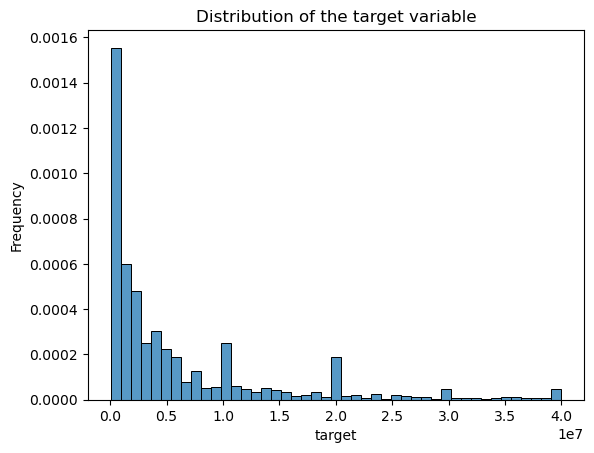

In [29]:
# Plot the distribution of the target variable

sns.histplot(data=data, x = 'target', stat = 'frequency')
plt.title('Distribution of the target variable')
plt.show()

As seen, the analysis that can be made is that transactions are on the 'lower end of the spectrum'. This is so as most of the data falls in the range of 0.0 - 0.5

/Users/RyanMburu/Development/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


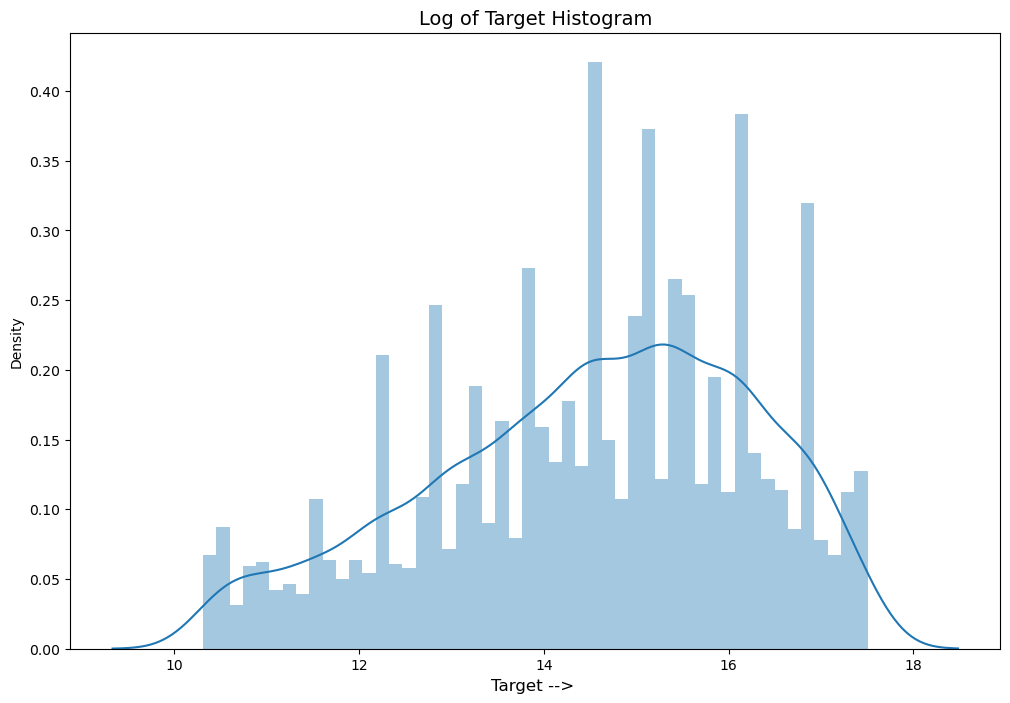

In [39]:
plt.figure(figsize=(12,8))
sns.distplot( np.log1p(data["target"].values), bins=50, kde=True)
plt.xlabel('Target --> ', fontsize=12)
plt.title("Log of Target Histogram", fontsize=14)
plt.show()

Using the log method, we can see a more accurate distribution of the target variable

## Data Splitting

In [77]:
# Data Splitting
drop_cols = ['ID', 'target']
drop_cols_test = ['ID']

X_train = data.drop(drop_cols, axis = 1)

X_test = data_test.drop(drop_cols_test, axis = 1)

y_train = np.log1p(data['target'].values)

In [32]:
y_train

array([17.45309674, 13.3046866 , 16.11809575, ..., 14.84513033,
       16.11809575, 16.81124288])

In [78]:
X_train.shape, X_test.shape

((4459, 4735), (49342, 4735))

## Baseline Model

In [33]:
#Will run through a quick regression model and check the RLMSE

# Data Splitting
drop_cols = ['ID', 'target']

data_BM = data.drop(drop_cols, axis = 1)
data_BM

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,0.0,0,0.0,0,0,0,0,0,70000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4455,0.0,0,0.0,0,0,0,0,0,375000.0,0.0,...,0.0,0.0,80000.0,0,0,0,0,0,0,0
4456,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4457,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [34]:
# Splitting
X_BM = data_BM.values

y_BM = data['target'].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_BM, y_BM, test_size = 0.2, random_state = 42)

X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
# Modeling

reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [37]:
y_pred = reg.predict(X_test)


df_comparison = pd.DataFrame({'OG Prices' : y_test, 'Predicted Prices' : y_pred})
df_comparison

,OG Prices,Predicted Prices
0,10000000.00,1.928760e+15
1,8000000.00,-8.832259e+14
2,4466666.66,-2.830384e+15
3,200000.00,-8.727000e+12
4,2640000.00,-8.721912e+12
...,...,...
887,13000000.00,-2.642640e+14
888,2000000.00,1.413418e+15
889,400000.00,-1.372504e+15
890,1240000.00,-2.706571e+15


In [38]:
# RMSE

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

4212660564080597.5

The RMSE scores are extrodinarily high

### Revisiting splitting, in this case will use validation due to the presence of test data

In [79]:
# Data Splitting
drop_cols = ['ID', 'target']
drop_cols_test = ['ID']

X = data.drop(drop_cols, axis = 1)

X_test = data_test.drop(drop_cols_test, axis = 1)

y = np.log1p(data['target'].values)

In [81]:
X.shape, X_test.shape

((4459, 4735), (49342, 4735))

In [82]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [83]:
X.shape

(4459, 4735)

In [84]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((3567, 4735), (892, 4735), (3567,), (892,))

### LGBM baseline

In [49]:
# Installing light GBM module on anaconda environment
conda install -c conda-forge lightgbm

Solving environment: done

## Package Plan ##

  environment location: /Users/RyanMburu/Development/anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.11.1              |   py39h6e9494a_1         874 KB  conda-forge
    lightgbm-3.3.3             |   py39hc23ddd4_1         1.3 MB  conda-forge
    ruamel.yaml-0.17.21        |   py39ha30fb19_2         173 KB  conda-forge
    ruamel.yaml.clib-0.2.7     |   py39ha30fb19_1         118 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  lightgbm           conda-forge/osx-64::lightgbm-3.3.3-py39hc23ddd4_1 None
  ruamel.yaml        conda-forge/osx-64::ruamel.yaml-0.17.21-py39ha30fb19_2 None
  ruamel.yaml.clib   conda-forge/osx-64::ruamel.yaml.cli

In [85]:
from sklearn import preprocessing, model_selection, metrics
import lightgbm as lgb

In [86]:
#Defining LGMB model

def run_lgb(X_train, y_train, X_valid, y_valid, X_test):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        #"num_leaves" : 80,
        "learning_rate" : 0.001,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 42,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(X_train, label = y_train)
    lgval   = lgb.Dataset(X_valid,   label = y_valid)
    
    evals_result = {}
    
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=200, evals_result=evals_result)
    
    pred_test = model.predict(X_test, num_iteration=model.best_iteration)
    
    return pred_test, model, evals_result

In [87]:
import warnings
warnings.filterwarnings('ignore')
pred_test_LGBM, model_LGBM, evals_result_LGBM = run_lgb(X_train, y_train, X_valid, y_valid, X_test)

[LightGBM] [Warning] Unknown parameter: bagging_frequency
Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 1.63833
[400]	valid_0's rmse: 1.57992
[600]	valid_0's rmse: 1.53525
[800]	valid_0's rmse: 1.5014
[1000]	valid_0's rmse: 1.47548
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 1.47548


In [ ]:
# Best RMSE is 1.475

# Thats a massive improvement from the high value we got during regression

### XGBOOST (Extreme Gradient Boosted Trees)

In [88]:
conda install -c conda-forge xgboost

Retrieving notices: ...working... /Users/RyanMburu/Development/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'repo.anaconda.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/RyanMburu/Development/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'repo.anaconda.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/RyanMburu/Development/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'conda.anaconda.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.

In [89]:
import xgboost as xgb

In [90]:
# XGBoost algorithm with evaluation metric set to RMSE(Root Mean Squared Error)

def run_xgb(X_train, y_train, X_valid, y_valid, X_test):
    params = {'objective': 'reg:linear', 
          'eval_metric': 'rmse',
          'eta': 0.005,
          'max_depth': 15, 
          'subsample': 0.7, 
          'colsample_bytree': 0.5,
          'alpha':0,
          'random_state': 42, 
          'silent': True}
    
    tr_data = xgb.DMatrix(X_train, y_train)
    va_data = xgb.DMatrix(X_valid, y_valid)
    
    watchlist = [(tr_data, 'train'), (va_data, 'valid')]
    
    model_xgb = xgb.train(params, tr_data, 2000, watchlist, maximize=False, early_stopping_rounds = 30, verbose_eval=100)
    
    dtest = xgb.DMatrix(X_test)
    xgb_pred_y = np.expm1(model_xgb.predict(dtest, ntree_limit=model_xgb.best_ntree_limit))
    
    return xgb_pred_y, model_xgb

In [91]:
# Performance of the model
pred_test_xgb, model_xgb = run_xgb(X_train, X_valid, y_train, y_valid, X_test)
print("XGB Training Completed...")

[12:59:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1667849653518/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:59:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1667849653518/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-rmse:14.01586	valid-rmse:14.08639
[100]	train-rmse:8.59744	valid-rmse:8.66606
[200]	train-rmse:5.35069	valid-rmse:5.43801
[300]	train-rmse:3.41049	valid-rmse:3.54619
[400]	train-rmse:2.26132	valid-rmse:2.47982
[500]	train-rmse:1.59784	valid-rmse:1.91739
[600]	train-rmse:1.22742	valid-rmse:1.64642
[700]	train-rmse:1.02574	valid-rmse:1.52346
[800]	train-rmse:0.91555	valid-rmse:1.47004
[900]	train-rmse:0.85467	valid-rmse:1.44654
[1000]	train-rmse:0.81544	valid-rmse:1.43513
[1100]	train-rmse:0.78553	valid-rmse:1.42898
[1200]	train-rmse:0.75981	valid-rmse:1.42466
[1300]	train-rmse:0.74000	valid-rmse:1.42265
[1400]	train-rmse:0.71887	valid-rmse:1.42022
[1

XGBoost's RMSE score is 1.418.

Slight improvememt over the LGBoost model

In [97]:
# Same XGBoost params but evaluation metric set to RMSLE(Root Mean Squared Log Error)

def run_xgb2(X_train, y_train, X_valid, y_valid, X_test):
    params = {'objective': 'reg:squaredlogerror', 
          'eval_metric': 'rmsle',
          'eta': 0.005,
          'max_depth': 15, 
          'subsample': 0.7, 
          'colsample_bytree': 0.5,
          'alpha':0,
          'random_state': 42, 
          'silent': True}
    
    tr_data = xgb.DMatrix(X_train, y_train)
    va_data = xgb.DMatrix(X_valid, y_valid)
    
    watchlist = [(tr_data, 'train'), (va_data, 'valid')]
    
    model_xgb = xgb.train(params, tr_data, 2000, watchlist, maximize=False, early_stopping_rounds = 30, verbose_eval=100)
    
    dtest = xgb.DMatrix(X_test)
    xgb_pred_y = np.expm1(model_xgb.predict(dtest, ntree_limit=model_xgb.best_ntree_limit))
    
    return xgb_pred_y, model_xgb

In [98]:
pred_test_xgb2, model_xgb2 = run_xgb2(X_train, X_valid, y_train, y_valid, X_test)
print("XGB Training Completed...")

XGBoostError: [13:24:03] /Users/runner/miniforge3/conda-bld/xgboost-split_1667849653518/work/src/data/data.cc:455: Check failed: this->labels.Size() % this->num_row_ == 0 (292 vs. 0) : Incorrect size for labels.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000124a2efc4 dmlc::LogMessageFatal::~LogMessageFatal() + 116
  [bt] (1) 2   libxgboost.dylib                    0x0000000124acc3dd xgboost::MetaInfo::SetInfoFromHost(xgboost::GenericParameter const&, xgboost::StringView, xgboost::Json) + 4301
  [bt] (2) 3   libxgboost.dylib                    0x0000000124acb1df xgboost::MetaInfo::SetInfo(xgboost::GenericParameter const&, xgboost::StringView, xgboost::StringView) + 159
  [bt] (3) 4   libxgboost.dylib                    0x0000000124a462c9 XGDMatrixSetInfoFromInterface + 249
  [bt] (4) 5   libffi.7.dylib                      0x000000010fb05ead ffi_call_unix64 + 85
  [bt] (5) 6   ???                                 0x00007ff7b090e1e0 0x0 + 140701795934688



In [99]:
# Errors arose when attempting to use RMSLE as an evaluation metric for the XGBoost